Aim of this project is to find best calssification algorithm for best separation between qualities.

Dataset contians:

1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>

# Dataset analysis

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# red - working name for data source
red = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
#checking for null values
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

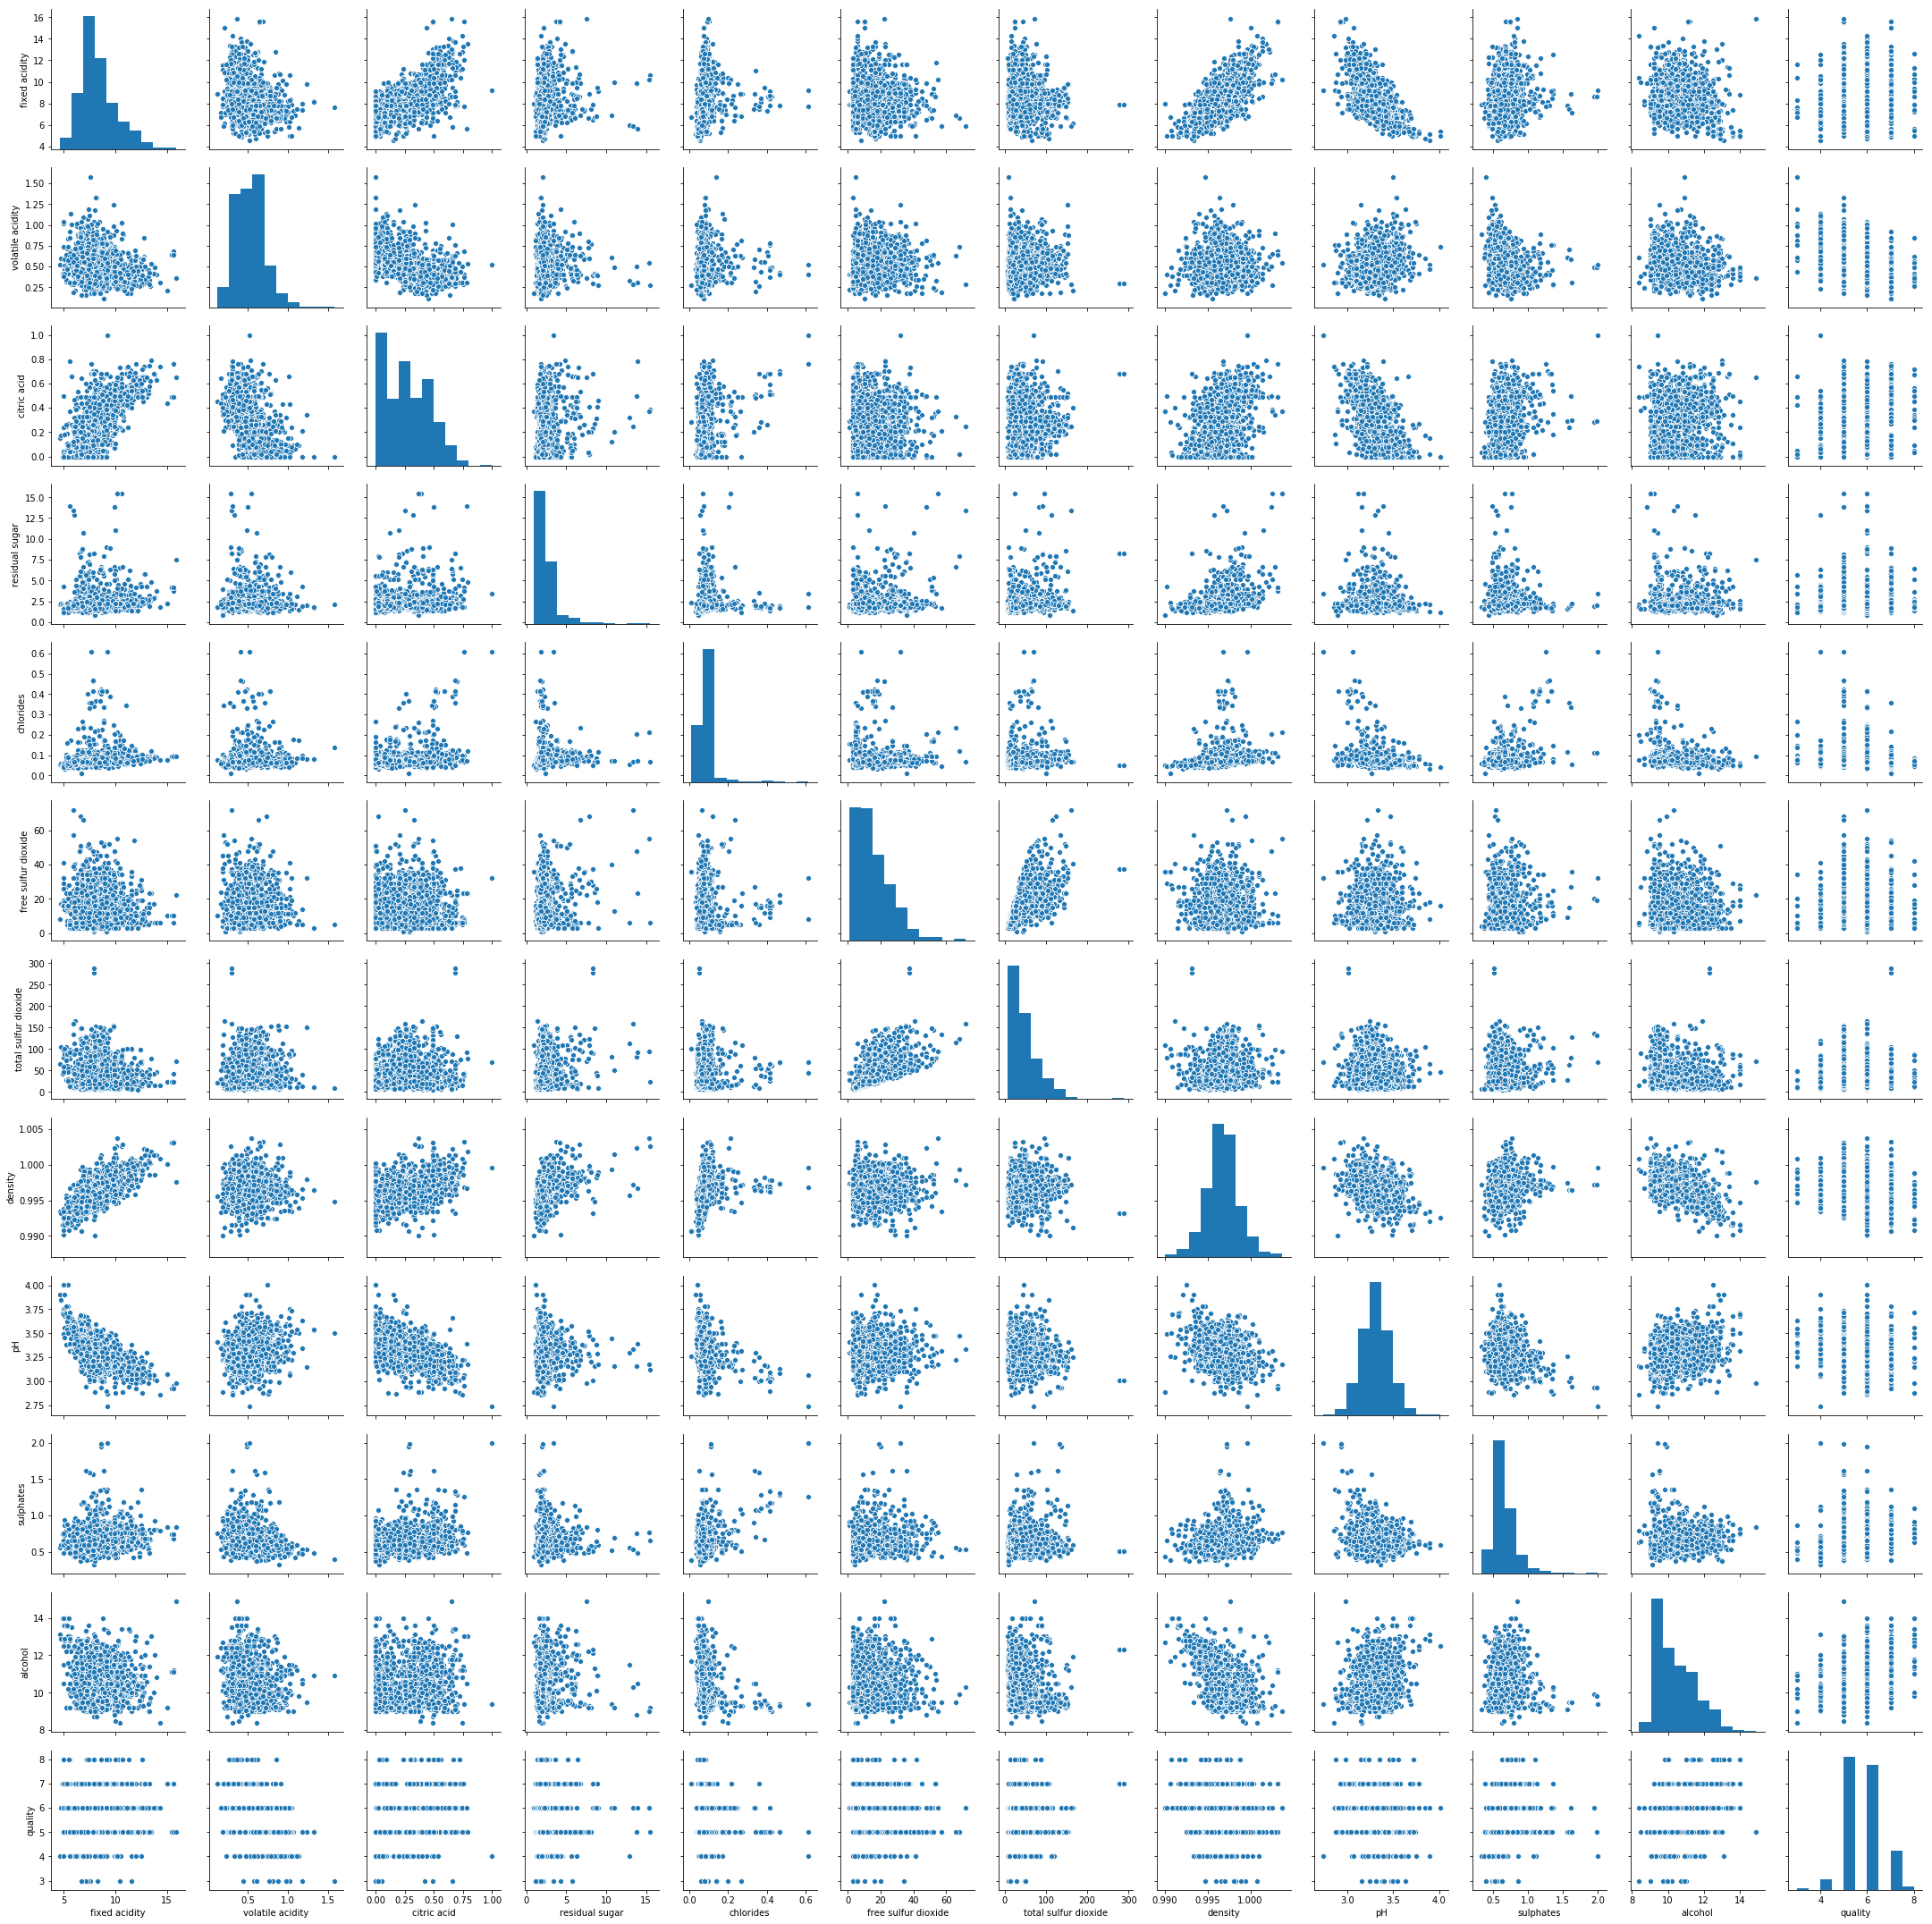

In [5]:
# ploting data to search for outliers and data coleration or outstanding behavior
sns.pairplot(red)

Plotting amount of each wine qualities

Text(0.5, 0, 'Wine Quality Category')

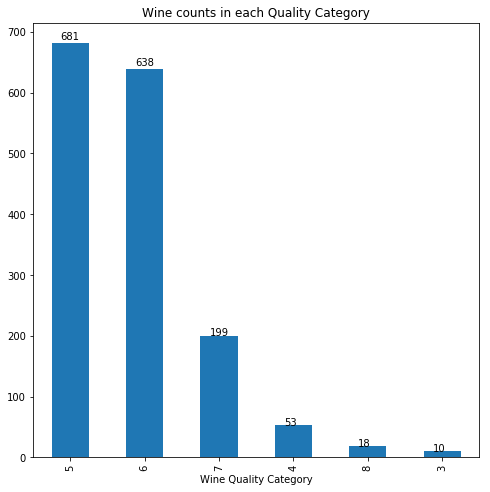

In [6]:
ax =red.quality.value_counts().plot(kind='bar',figsize=(8,8))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')), (p.get_x()+.12,p.get_height()*1.01),)

plt.title("Wine counts in each Quality Category")    
plt.xlabel("Wine Quality Category")

Seeking for outliers and deleting from dataframe

Text(0, 0.5, 'Total sulfur dioxide')

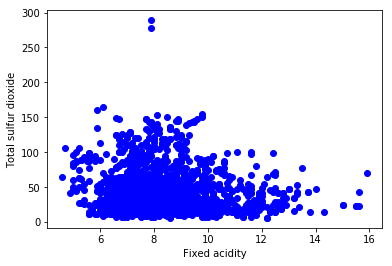

In [8]:
plt.plot(red['fixed acidity'],red["total sulfur dioxide"],'bo')
plt.xlabel('Fixed acidity')
plt.ylabel('Total sulfur dioxide')

In [9]:
red['total sulfur dioxide'].value_counts().sort_index(ascending=False).head(10)

289.0    1
278.0    1
165.0    1
160.0    1
155.0    1
153.0    1
152.0    1
151.0    2
149.0    1
148.0    2
Name: total sulfur dioxide, dtype: int64

In [10]:
tot_sul_dix = red['total sulfur dioxide'] > 270

In [11]:
red.drop(red[tot_sul_dix].index, axis = 0, inplace=True)

Text(0, 0.5, 'Total sulfur dioxide')

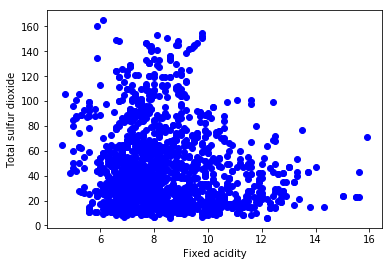

In [12]:
plt.plot(red['fixed acidity'],red["total sulfur dioxide"],'bo')
plt.xlabel('Fixed acidity')
plt.ylabel('Total sulfur dioxide')

Text(0, 0.5, 'Chlorides')

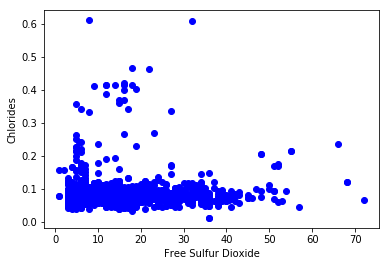

In [13]:
plt.plot(red['free sulfur dioxide'],red.chlorides,'bo')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Chlorides')

In [14]:
red.chlorides.value_counts().sort_index(ascending=False).head(10)

0.611    1
0.610    1
0.467    1
0.464    1
0.422    1
0.415    3
0.414    2
0.413    1
0.403    1
0.401    1
Name: chlorides, dtype: int64

In [15]:
chlor = red.chlorides > 0.6

In [16]:
red.drop(red[chlor].index, axis=0, inplace=True)

Text(0, 0.5, 'Chlorides')

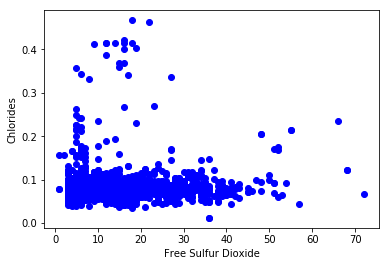

In [17]:
plt.plot(red['free sulfur dioxide'],red.chlorides,'bo')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Chlorides')

Text(0, 0.5, 'Sulphates')

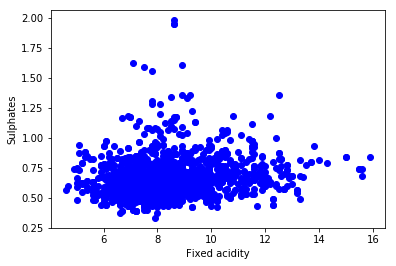

In [18]:
plt.plot(red['fixed acidity'],red.sulphates,'bo')
plt.xlabel('Fixed acidity')
plt.ylabel('Sulphates')

In [19]:
red.sulphates.value_counts().sort_index(ascending=False).head(10)

1.98    1
1.95    2
1.62    1
1.61    1
1.59    1
1.56    1
1.36    3
1.34    1
1.33    1
1.31    1
Name: sulphates, dtype: int64

In [20]:
sulp = red.sulphates > 1.80

In [21]:
red.drop(red[sulp].index, axis = 0, inplace = True)

Text(0, 0.5, 'Sulphates')

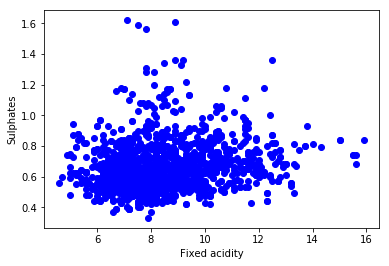

In [22]:
plt.plot(red['fixed acidity'],red.sulphates,'bo')
plt.xlabel('Fixed acidity')
plt.ylabel('Sulphates')

Text(0, 0.5, 'Alcohol')

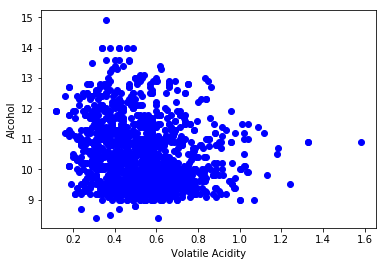

In [23]:
plt.plot(red['volatile acidity'],red.alcohol,'bo')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')

In [24]:
red.alcohol.value_counts().sort_index(ascending=False).head(10)

14.900000    1
14.000000    7
13.600000    4
13.566667    1
13.500000    1
13.400000    3
13.300000    3
13.200000    1
13.100000    2
13.000000    6
Name: alcohol, dtype: int64

In [25]:
red['volatile acidity'].value_counts().sort_index(ascending=False).head(10)

1.580    1
1.330    2
1.240    1
1.185    1
1.180    1
1.130    1
1.115    1
1.090    1
1.070    1
1.040    3
Name: volatile acidity, dtype: int64

In [26]:
alc = red.alcohol > 14.5
vola_acid = red['volatile acidity'] > 1.5

In [27]:
red.drop(red[alc].index, axis=0,inplace=True)

In [28]:
red.drop(red[vola_acid].index, axis=0,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Alcohol')

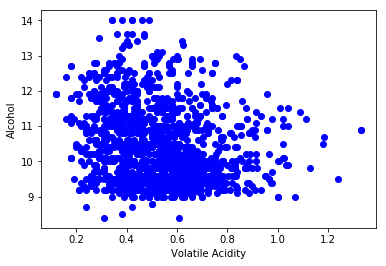

In [29]:
plt.plot(red['volatile acidity'],red.alcohol,'bo')
plt.xlabel('Volatile Acidity')
plt.ylabel('Alcohol')

Plotting all dataframe divided into each wine qualities

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


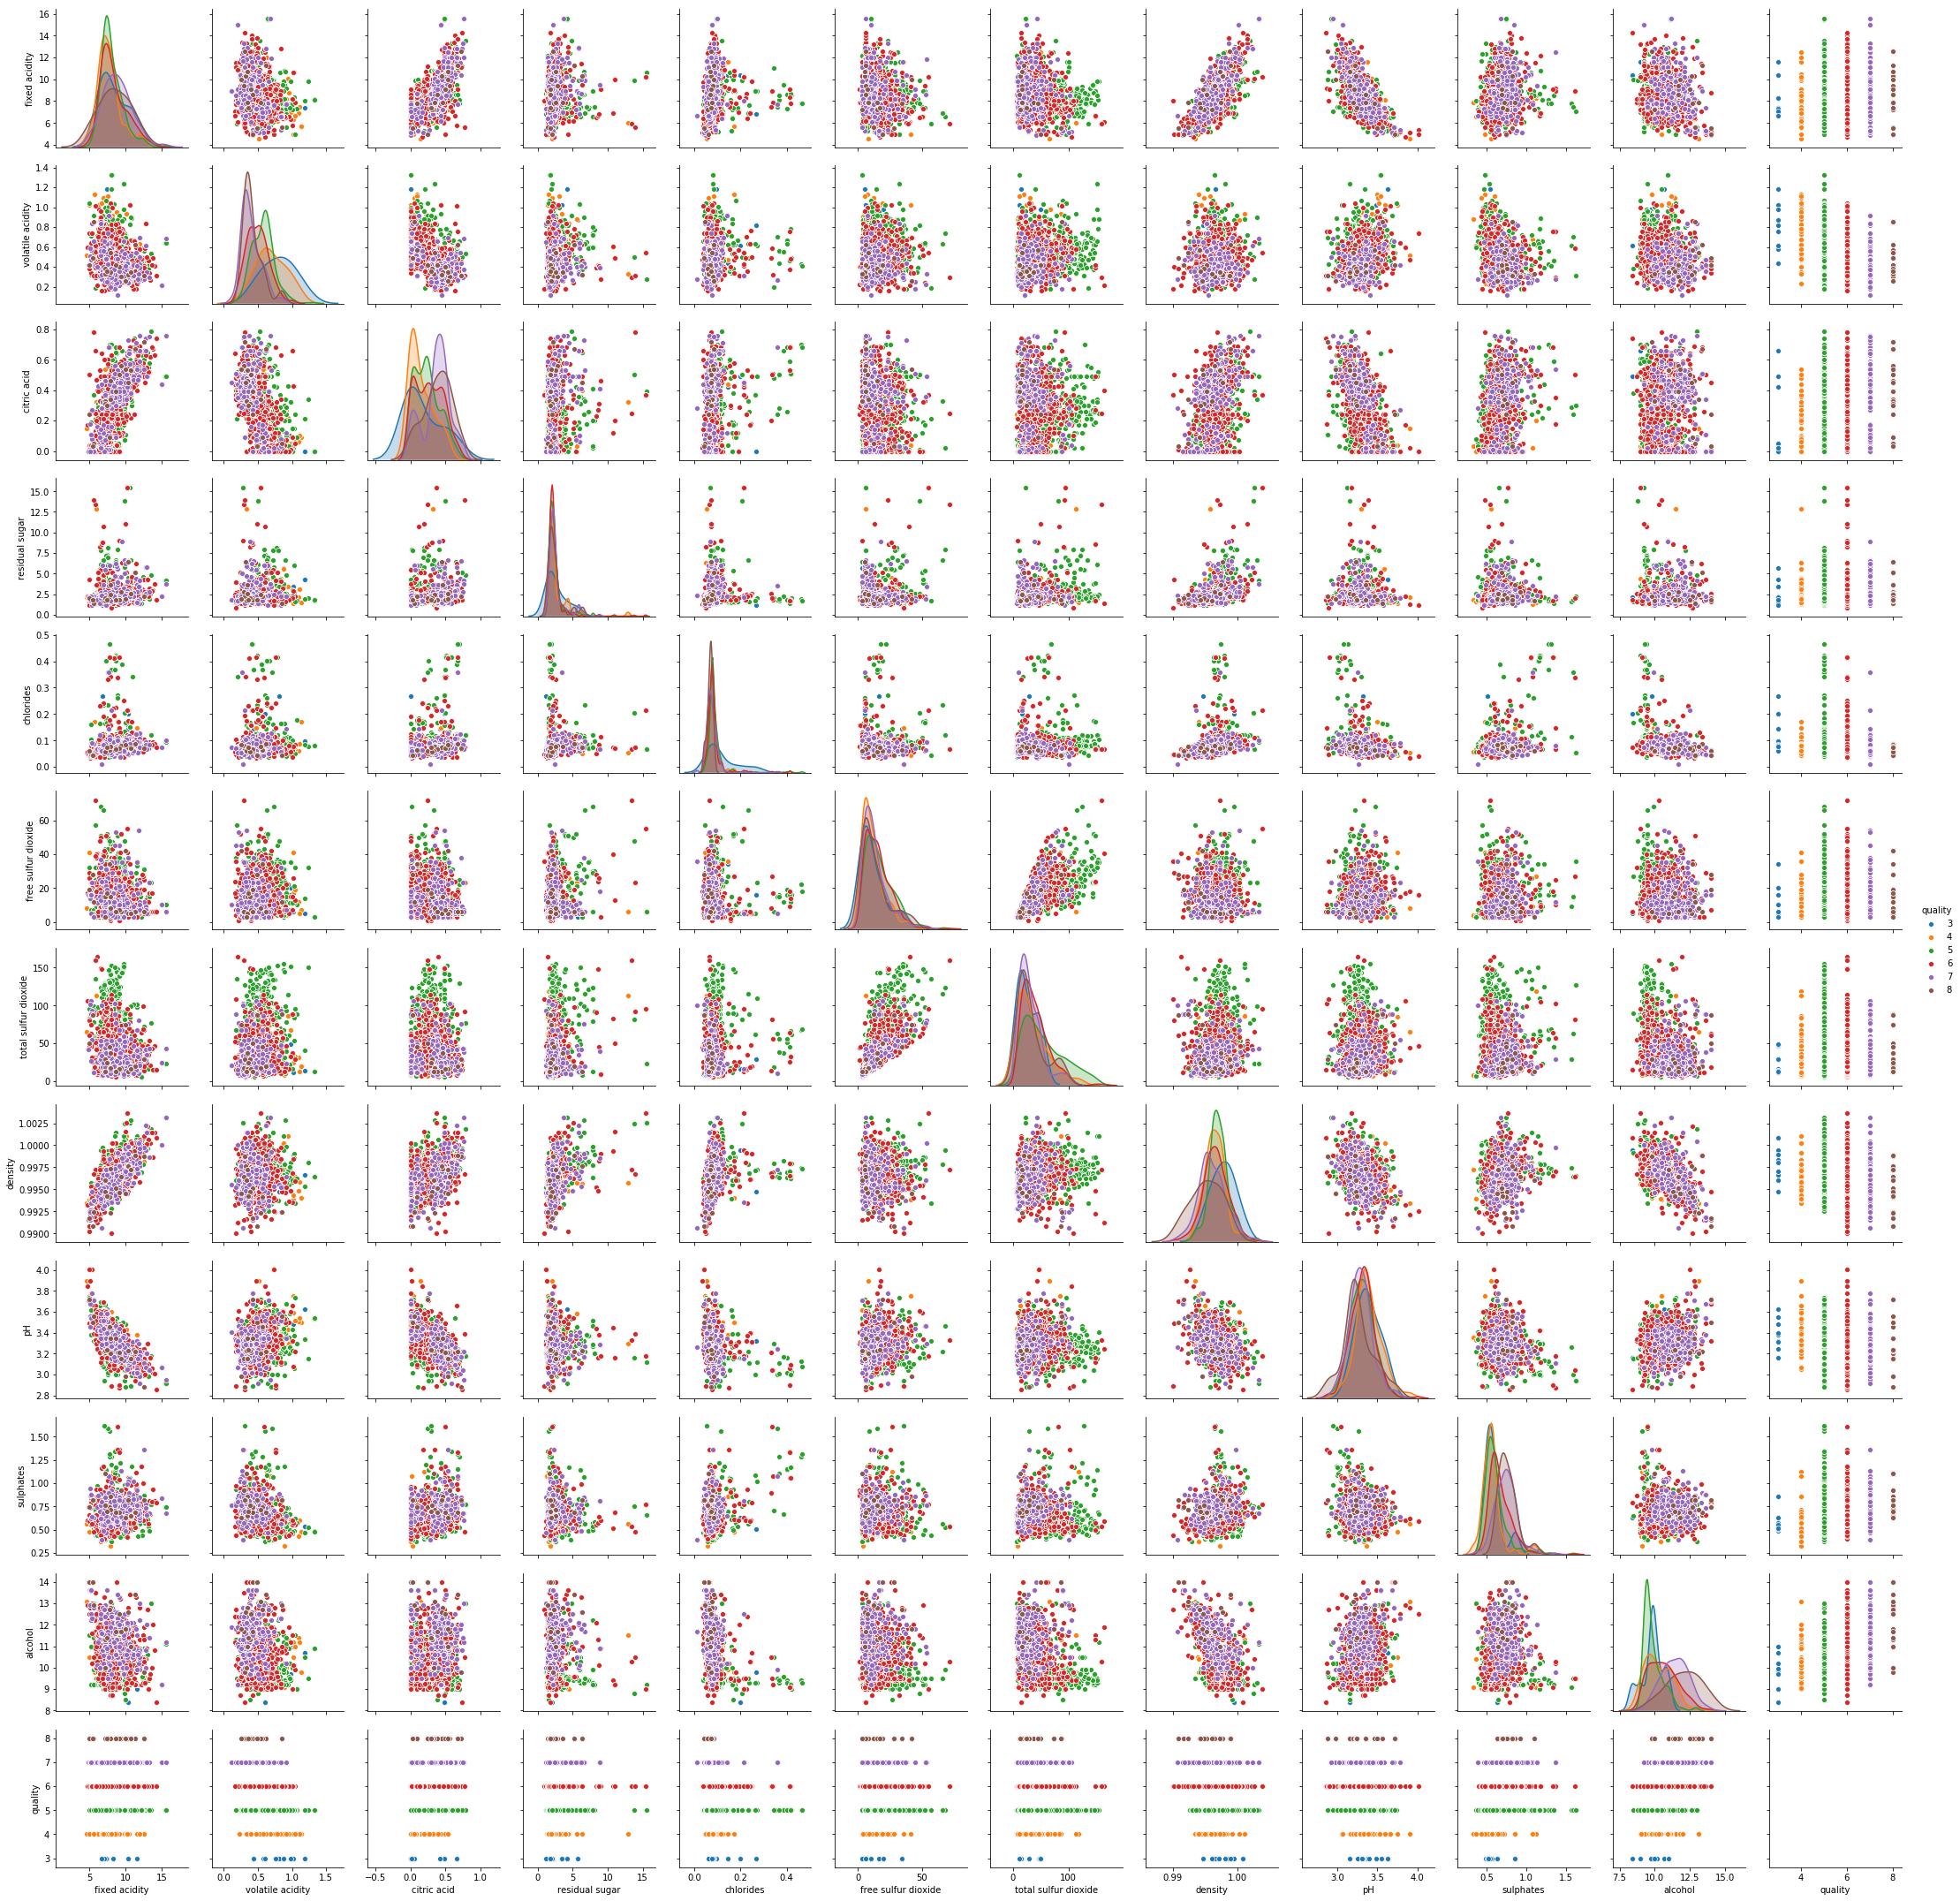

In [30]:
sns.pairplot(red,hue='quality')

Plotting amount of each wine qualities after deleting outliers

Text(0.5, 0, 'Wine Quality Category')

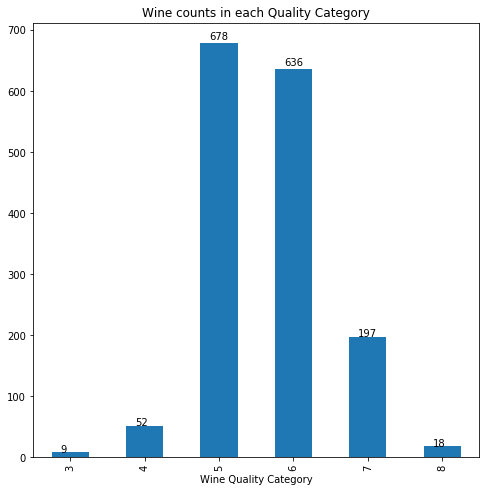

In [31]:
ax =red.quality.value_counts().sort_index().plot(kind='bar',figsize=(8,8))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()),',d')), (p.get_x()+.12,p.get_height()*1.01),)

plt.title("Wine counts in each Quality Category")    
plt.xlabel("Wine Quality Category")

Plotting to see how data corelates

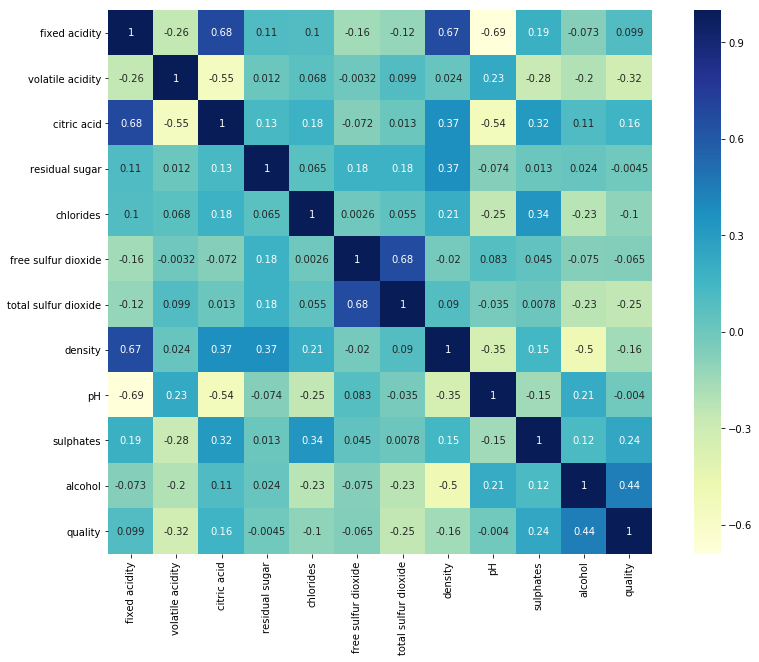

In [148]:
correlation = red.corr()
plt.figure(figsize = (15,10))
sns.heatmap(correlation,cmap = 'YlGnBu',vmax=1,square=True,annot=True)

Plotting only one half of heat map

In [33]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

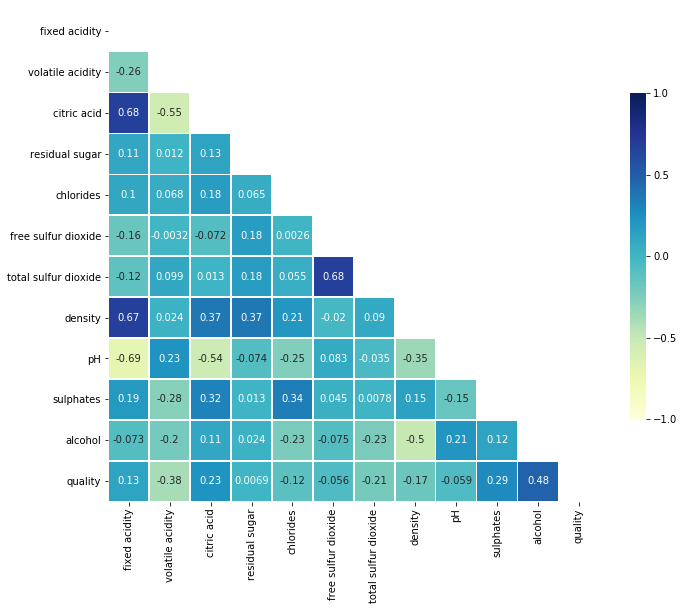

In [34]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(correlation,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'YlGnBu',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      #annot_kws = {'size': 12}
                     )

#add the column names as labels
ax.set_yticklabels(correlation.columns, rotation = 0)
ax.set_xticklabels(correlation.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Preparing data for modeling

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# copy for second grouping
red2 = red.copy()

Grouping all data into two groups

In [37]:
# red - nazwa zaczytanego pliku

#zmiana wartości klasyfikacji na wartosci 0,1 podział na pół 3-5 = 0, 6-8 =1
red['quality'] = red['quality'].map({
        3 : 0,
        4 : 0,
        5 : 0,
        6 : 1,
        7 : 1,
        8 : 1         
})

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


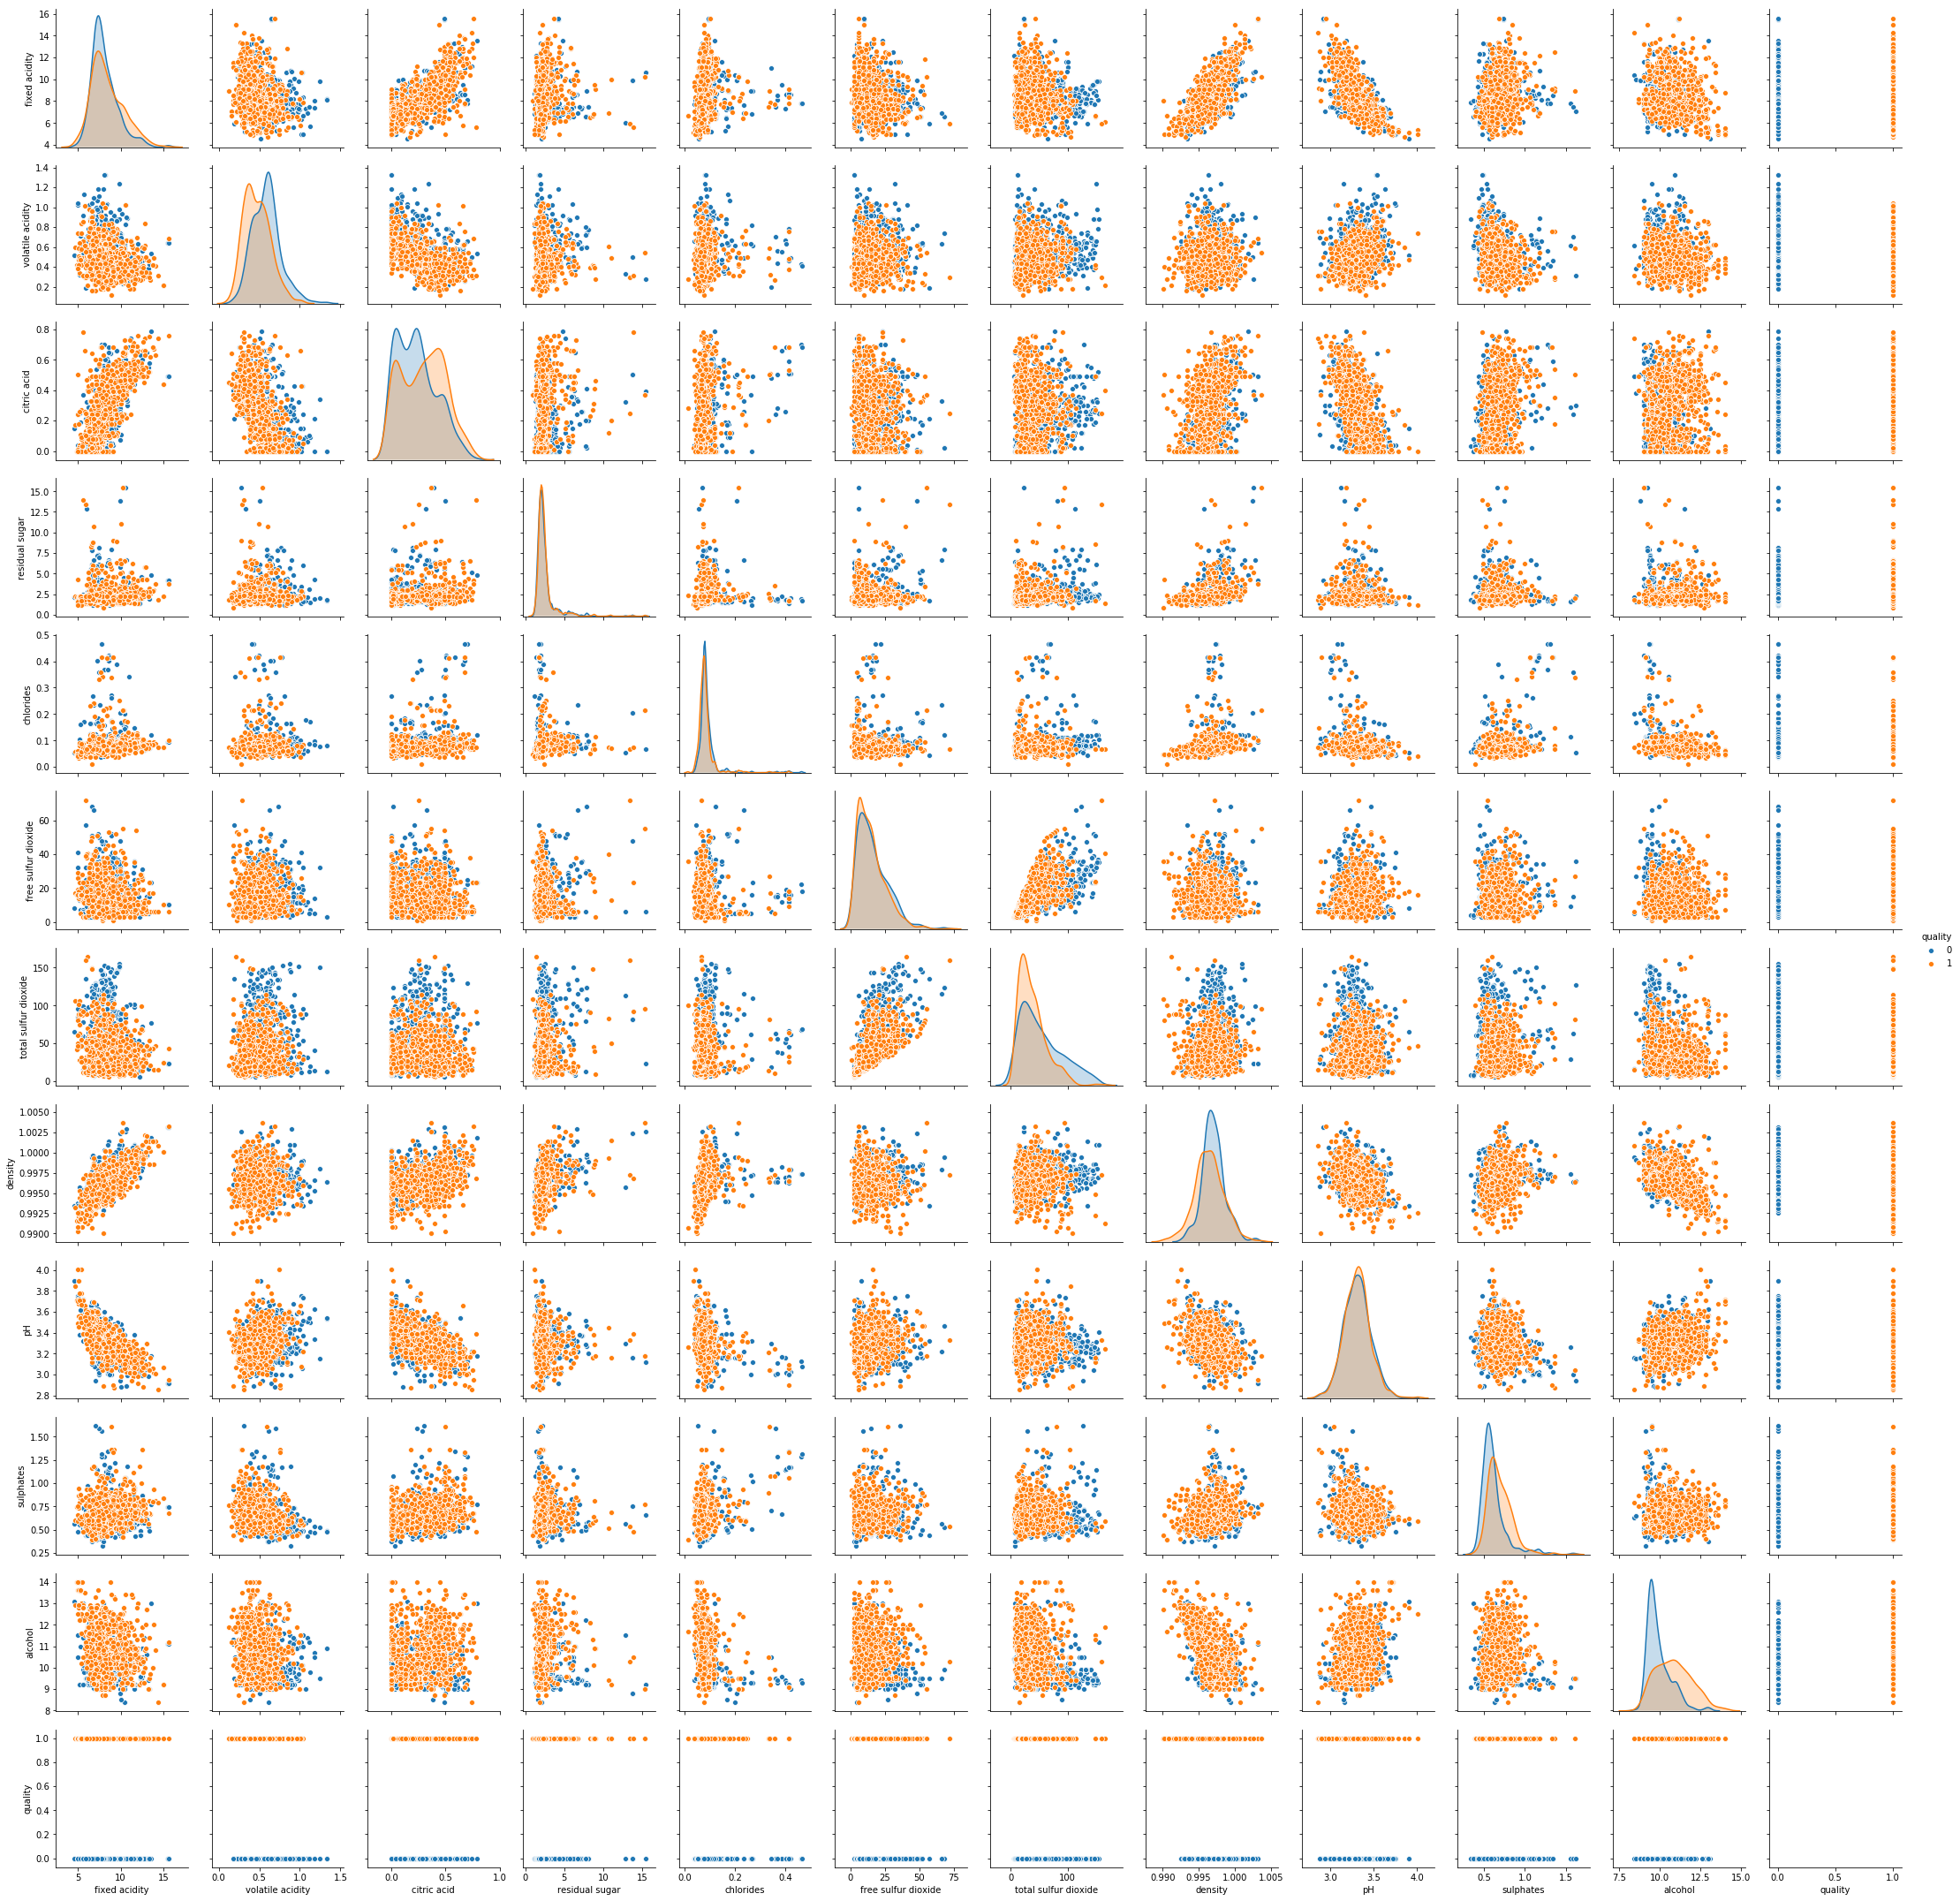

In [38]:
sns.pairplot(red,hue='quality')

In [39]:
X = red.drop('quality', 1) #wyciągniecie zmiennych objaśnianych
y = red.quality #wyciagnięcie kolumny z klasyfikacją wina

80/20 split 

In [40]:
#podzielenie danych na grupę do trenowania modelu i testowania
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state=101
)

90/10 split

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, 
    y, 
    test_size = 0.1, 
    random_state = 101
)

## Leaving only two significant groups

In [42]:
indexNames = red2[(red2['quality'] == 4) | (red2['quality'] == 8) | (red2['quality'] == 3) | (red2['quality'] == 7)].index

In [43]:
red2.drop(indexNames , inplace=True)

In [44]:
#zmiana wartości klasyfikacji na wartosci 0,1 podział na pół 3-5 = 0, 6-8 =1
red2['quality'] = red2['quality'].map({
        5 : 0,
        6 : 1        
})

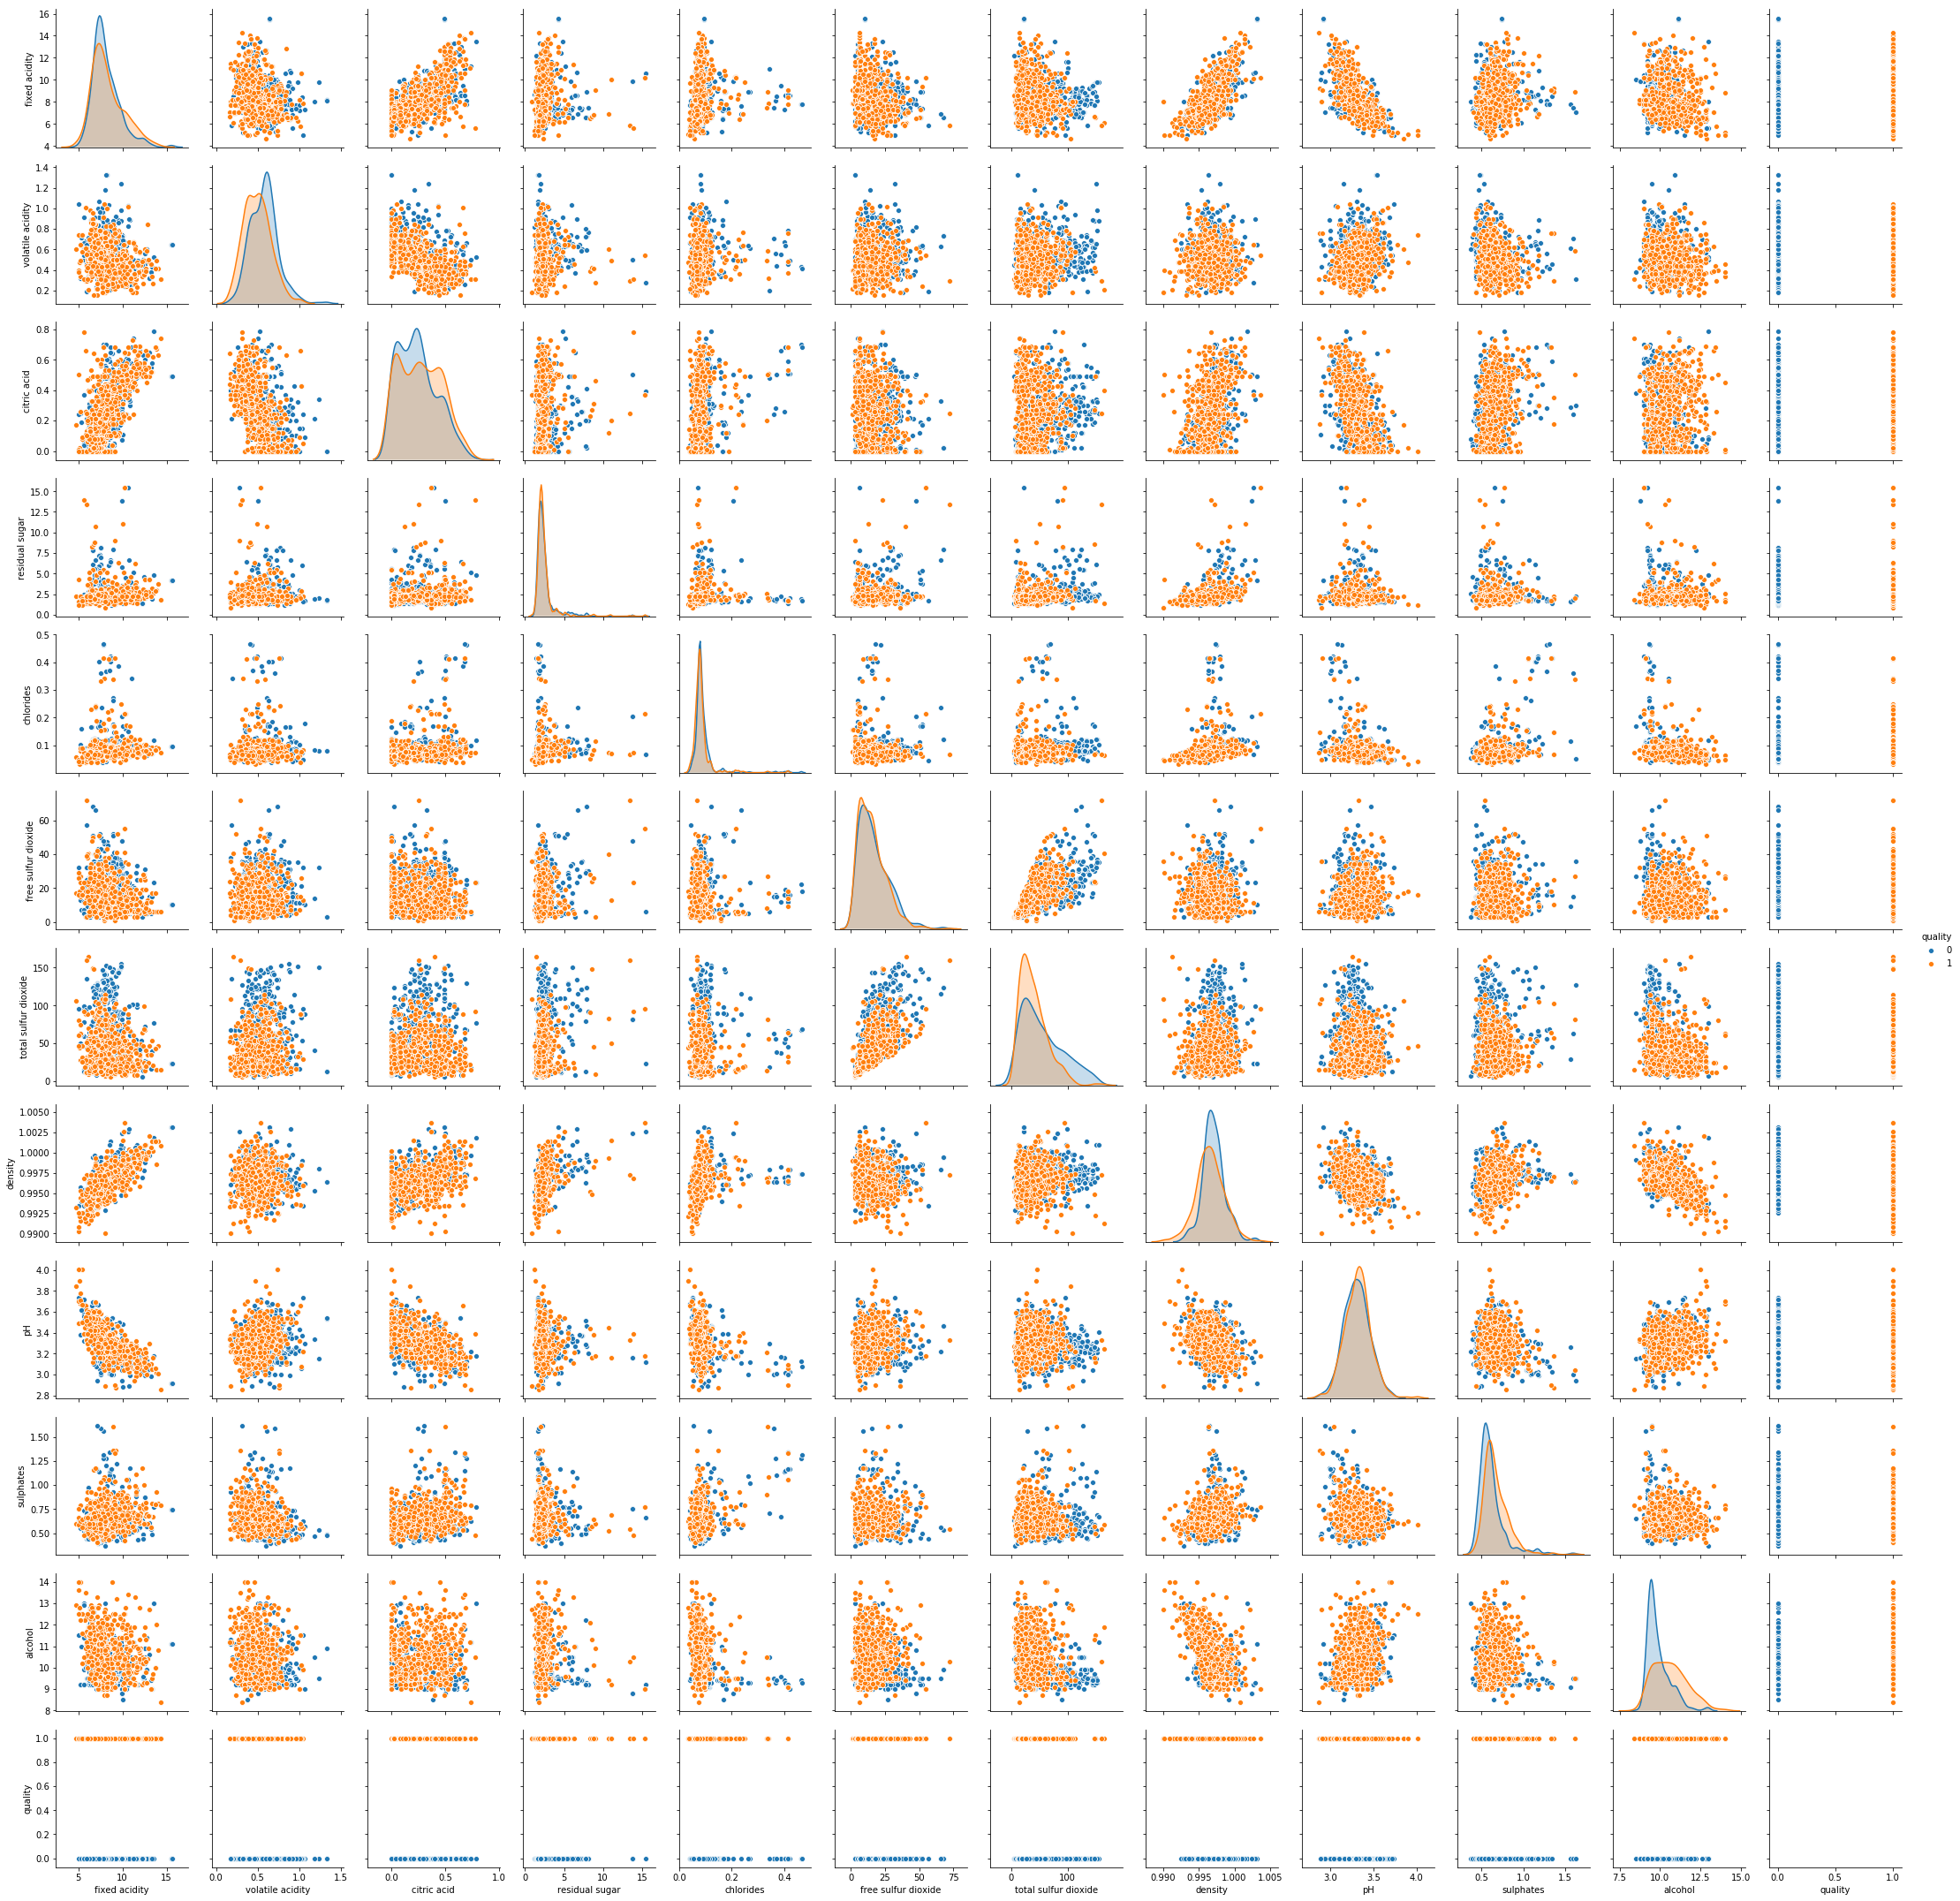

In [45]:
sns.pairplot(red2,hue='quality')

In [46]:
X2 = red2.drop('quality', 1) #wyciągniecie zmiennych objaśnianych

In [47]:
y2 = red2.quality #wyciagnięcie kolumny z klasyfikacją wina

80/20 split

In [48]:
#podzielenie danych na grupę do trenowania modelu i testowania
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, 
    y2,
    test_size = 0.2,
    random_state=101
)

90/10 split 

In [49]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X2, 
    y2,
    test_size = 0.1,
    random_state=100
)

## Logistic Regression

In [50]:
#import bibliotek do zbudowania modelu regresji logistycznej
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

### Removing features according to p-value significance level

In [51]:
#wprowadzenie dancyh do modelu regresji logistycznej i sprawdzenie jak model opisuje dane
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
model_pred = logreg.predict(X_test)

print("Accuracy score\n", round(accuracy_score(y_test,model_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,model_pred))
print("\nClassification report\n",classification_report(y_test,model_pred))

Accuracy score
 0.77

Confusion matrix
 [[100  30]
 [ 43 145]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       130
           1       0.83      0.77      0.80       188

    accuracy                           0.77       318
   macro avg       0.76      0.77      0.77       318
weighted avg       0.78      0.77      0.77       318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


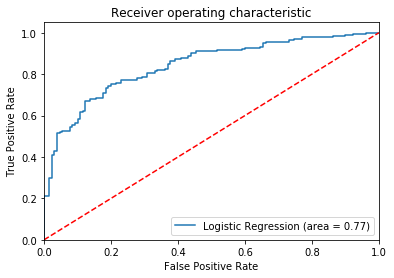

In [52]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [53]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.512580
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.258      
Dependent Variable:  quality           AIC:               1652.0058  
Date:                2020-02-25 18:51  BIC:               1711.0922  
No. Observations:    1590              Log-Likelihood:    -815.00    
Df Model:            10                LL-Null:           -1098.2    
Df Residuals:        1579              LLR p-value:       2.8984e-115
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.1078   0.0643  1.6752 0.0939  -0.0183  0.2339
volatile acidity

In [54]:
X.drop('residual sugar',axis=1,inplace=True)

In [55]:
X_traina, X_testa, y_traina, y_testa = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state=101
)

#wprowadzenie dancyh do modelu regresji logistycznej i sprawdzenie jak model opisuje dane
logreg2 = LogisticRegression()
logreg2.fit(X_traina, y_traina)
model_pred2 = logreg2.predict(X_testa)

print("Accuracy score\n", round(accuracy_score(y_testa,model_pred2),3))
print("\nConfusion matrix\n", confusion_matrix(y_testa,model_pred2))
print("\nClassification report\n",classification_report(y_testa,model_pred2))

Accuracy score
 0.767

Confusion matrix
 [[100  30]
 [ 44 144]]

Classification report
               precision    recall  f1-score   support

           0       0.69      0.77      0.73       130
           1       0.83      0.77      0.80       188

    accuracy                           0.77       318
   macro avg       0.76      0.77      0.76       318
weighted avg       0.77      0.77      0.77       318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


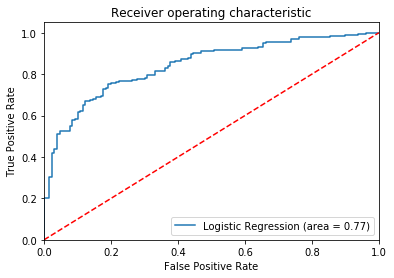

In [56]:
logit_roc_auc = roc_auc_score(y_testa, logreg2.predict(X_testa))
fpr, tpr, thresholds = roc_curve(y_testa, logreg2.predict_proba(X_testa)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.512777
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.258      
Dependent Variable:  quality           AIC:               1650.6315  
Date:                2020-02-25 18:51  BIC:               1704.3464  
No. Observations:    1590              Log-Likelihood:    -815.32    
Df Model:            9                 LL-Null:           -1098.2    
Df Residuals:        1580              LLR p-value:       4.8322e-116
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.1094   0.0643  1.7010 0.0889  -0.0167  0.2355
volatile acidity

In [58]:
X.drop('pH',axis=1,inplace=True)

In [59]:
X_trainb, X_testb, y_trainb, y_testb = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state=101
)

#wprowadzenie dancyh do modelu regresji logistycznej i sprawdzenie jak model opisuje dane
logreg3 = LogisticRegression()
logreg3.fit(X_trainb, y_trainb)
model_pred3 = logreg3.predict(X_testb)

print("Accuracy score\n", round(accuracy_score(y_testb,model_pred3),3))
print("\nConfusion matrix\n", confusion_matrix(y_testb,model_pred3))
print("\nClassification report\n",classification_report(y_testb,model_pred3))

Accuracy score
 0.761

Confusion matrix
 [[ 94  36]
 [ 40 148]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       130
           1       0.80      0.79      0.80       188

    accuracy                           0.76       318
   macro avg       0.75      0.76      0.75       318
weighted avg       0.76      0.76      0.76       318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513086
         Iterations 6
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.257      
Dependent Variable:  quality           AIC:               1649.6127  
Date:                2020-02-25 18:51  BIC:               1697.9561  
No. Observations:    1590              Log-Likelihood:    -815.81    
Df Model:            8                 LL-Null:           -1098.2    
Df Residuals:        1581              LLR p-value:       9.0343e-117
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      6.0000                                          
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
fixed acidity         0.1469   0.0522  2.8169 0.0048   0.0447  0.2492
volatile acidity

In [61]:
X.drop('chlorides',axis=1,inplace=True)

In [62]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(
    X,
    y, 
    test_size = 0.2,
    random_state=101
)

#wprowadzenie dancyh do modelu regresji logistycznej i sprawdzenie jak model opisuje dane
logreg4 = LogisticRegression()
logreg4.fit(X_trainc, y_trainc)
model_pred4 = logreg4.predict(X_testc)

print("Accuracy score\n", round(accuracy_score(y_testc,model_pred4),3))
print("\nConfusion matrix\n", confusion_matrix(y_testc,model_pred4))
print("\nClassification report\n",classification_report(y_testc,model_pred4))

Accuracy score
 0.755

Confusion matrix
 [[ 94  36]
 [ 42 146]]

Classification report
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       130
           1       0.80      0.78      0.79       188

    accuracy                           0.75       318
   macro avg       0.75      0.75      0.75       318
weighted avg       0.76      0.75      0.76       318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [63]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.514244
         Iterations 6
                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.255      
Dependent Variable:   quality           AIC:               1651.2972  
Date:                 2020-02-25 18:51  BIC:               1694.2692  
No. Observations:     1590              Log-Likelihood:    -817.65    
Df Model:             7                 LL-Null:           -1098.2    
Df Residuals:         1582              LLR p-value:       6.0160e-117
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
----------------------------------------------------------------------
fixed acidity         0.1625   0.0515   3.1524 0.0016   0.0615  0.2635
vol

Model accuracy is droping with removing features.

In [64]:
logreg5 = LogisticRegression()
logreg5.fit(X_train1, y_train1)
model_pred5 = logreg5.predict(X_test1)

print("Accuracy score\n", round(accuracy_score(y_test1,model_pred5),3))
print("\nConfusion matrix\n", confusion_matrix(y_test1,model_pred5))
print("\nClassification report\n",classification_report(y_test1,model_pred5))

Accuracy score
 0.698

Confusion matrix
 [[48 20]
 [28 63]]

Classification report
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        68
           1       0.76      0.69      0.72        91

    accuracy                           0.70       159
   macro avg       0.70      0.70      0.70       159
weighted avg       0.70      0.70      0.70       159



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Removing features according to the correlation

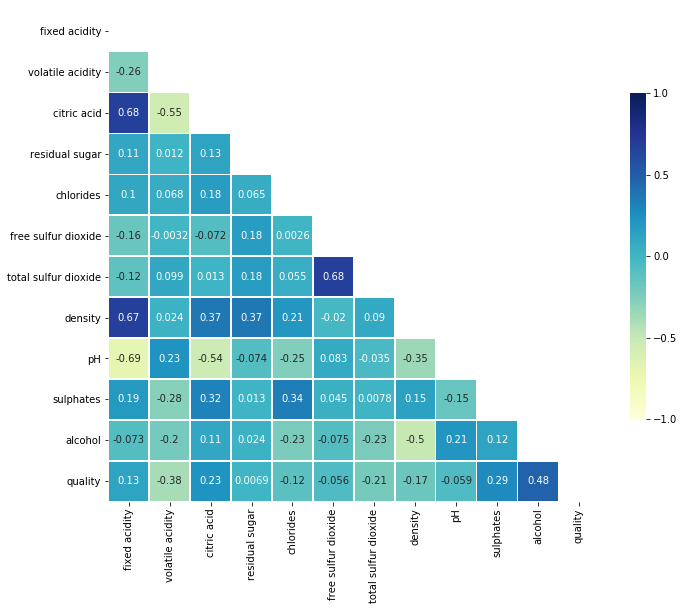

In [65]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(correlation,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'YlGnBu',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      #annot_kws = {'size': 12}
                     )

#add the column names as labels
ax.set_yticklabels(correlation.columns, rotation = 0)
ax.set_xticklabels(correlation.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#### Identify Highly Correlated Features

In [66]:
corr_matrix = red.corr().abs()

In [67]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [68]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [69]:
to_drop

[]

No features to drop

###  Two major groups

In [72]:
logreg6 = LogisticRegression()
logreg6.fit(X_train2, y_train2)
model_pred6 = logreg6.predict(X_test2)

print("Accuracy score\n", round(accuracy_score(y_test2,model_pred6),3))
print("\nConfusion matrix\n", confusion_matrix(y_test2,model_pred6))
print("\nClassification report\n",classification_report(y_test2,model_pred6))

Accuracy score
 0.688

Confusion matrix
 [[92 37]
 [45 89]]

Classification report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       129
           1       0.71      0.66      0.68       134

    accuracy                           0.69       263
   macro avg       0.69      0.69      0.69       263
weighted avg       0.69      0.69      0.69       263



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
logreg7 = LogisticRegression()
logreg7.fit(X_train3, y_train3)
model_pred7 = logreg7.predict(X_test3)

print("Accuracy score\n", round(accuracy_score(y_test3,model_pred7),3))
print("\nConfusion matrix\n", confusion_matrix(y_test3,model_pred7))
print("\nClassification report\n",classification_report(y_test3,model_pred7))

Accuracy score
 0.727

Confusion matrix
 [[51 14]
 [22 45]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        65
           1       0.76      0.67      0.71        67

    accuracy                           0.73       132
   macro avg       0.73      0.73      0.73       132
weighted avg       0.73      0.73      0.73       132



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Decision Tree Classifier

### All types

In [74]:
#Importwanmie bilblioteki z modelem
from sklearn.tree import DecisionTreeClassifier

In [75]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

print("Accuracy score\n", round(accuracy_score(y_test,decision_tree_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,decision_tree_pred))
print("\nClassification report\n",classification_report(y_test,decision_tree_pred))

Accuracy score
 0.761

Confusion matrix
 [[ 96  34]
 [ 42 146]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       130
           1       0.81      0.78      0.79       188

    accuracy                           0.76       318
   macro avg       0.75      0.76      0.75       318
weighted avg       0.76      0.76      0.76       318



### Smaller training set

In [76]:
decision_tree1 = DecisionTreeClassifier()
decision_tree1.fit(X_train1, y_train1)
decision_tree_pred1 = decision_tree1.predict(X_test1)

print("Accuracy score\n", round(accuracy_score(y_test1,decision_tree_pred1),3))
print("\nConfusion matrix\n", confusion_matrix(y_test1,decision_tree_pred1))
print("\nClassification report\n",classification_report(y_test1,decision_tree_pred1))

Accuracy score
 0.761

Confusion matrix
 [[51 17]
 [21 70]]

Classification report
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        68
           1       0.80      0.77      0.79        91

    accuracy                           0.76       159
   macro avg       0.76      0.76      0.76       159
weighted avg       0.76      0.76      0.76       159



### 2 major groups 

In [77]:
decision_tree2 = DecisionTreeClassifier()
decision_tree2.fit(X_train2, y_train2)
decision_tree_pred2 = decision_tree2.predict(X_test2)

print("Accuracy score\n", round(accuracy_score(y_test2,decision_tree_pred2),3))
print("\nConfusion matrix\n", confusion_matrix(y_test2,decision_tree_pred2))
print("\nClassification report\n",classification_report(y_test2,decision_tree_pred2))

Accuracy score
 0.707

Confusion matrix
 [[92 37]
 [40 94]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.71      0.70       129
           1       0.72      0.70      0.71       134

    accuracy                           0.71       263
   macro avg       0.71      0.71      0.71       263
weighted avg       0.71      0.71      0.71       263



### Smaller set

In [78]:
decision_tree3 = DecisionTreeClassifier()
decision_tree3.fit(X_train3, y_train3)
decision_tree_pred3 = decision_tree3.predict(X_test3)

print("Accuracy score\n", round(accuracy_score(y_test3,decision_tree_pred3),3))
print("\nConfusion matrix\n", confusion_matrix(y_test3,decision_tree_pred3))
print("\nClassification report\n",classification_report(y_test3,decision_tree_pred3))

Accuracy score
 0.712

Confusion matrix
 [[48 17]
 [21 46]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        65
           1       0.73      0.69      0.71        67

    accuracy                           0.71       132
   macro avg       0.71      0.71      0.71       132
weighted avg       0.71      0.71      0.71       132



## Random forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

### All types

In [80]:
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest_pred = rand_forest.predict(X_test)

print("Accuracy score\n", round(accuracy_score(y_test,rand_forest_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,rand_forest_pred))
print("\nClassification report\n",classification_report(y_test,rand_forest_pred))

Accuracy score
 0.808

Confusion matrix
 [[113  17]
 [ 44 144]]

Classification report
               precision    recall  f1-score   support

           0       0.72      0.87      0.79       130
           1       0.89      0.77      0.83       188

    accuracy                           0.81       318
   macro avg       0.81      0.82      0.81       318
weighted avg       0.82      0.81      0.81       318



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Smaller training set

In [81]:
rand_forest1 = RandomForestClassifier()
rand_forest1.fit(X_train1, y_train1)
rand_forest_pred1 = rand_forest1.predict(X_test1)

print("Accuracy score\n", round(accuracy_score(y_test1,rand_forest_pred1),3))
print("\nConfusion matrix\n", confusion_matrix(y_test1,rand_forest_pred1))
print("\nClassification report\n",classification_report(y_test1,rand_forest_pred1))

Accuracy score
 0.811

Confusion matrix
 [[55 13]
 [17 74]]

Classification report
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        68
           1       0.85      0.81      0.83        91

    accuracy                           0.81       159
   macro avg       0.81      0.81      0.81       159
weighted avg       0.81      0.81      0.81       159



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 2 major groups

In [82]:
rand_forest2 = RandomForestClassifier()
rand_forest2.fit(X_train2, y_train2)
rand_forest_pred2 = rand_forest2.predict(X_test2)

print("Accuracy score\n", round(accuracy_score(y_test2,rand_forest_pred2),3))
print("\nConfusion matrix\n", confusion_matrix(y_test2,rand_forest_pred2))
print("\nClassification report\n",classification_report(y_test2,rand_forest_pred2))

Accuracy score
 0.753

Confusion matrix
 [[107  22]
 [ 43  91]]

Classification report
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       129
           1       0.81      0.68      0.74       134

    accuracy                           0.75       263
   macro avg       0.76      0.75      0.75       263
weighted avg       0.76      0.75      0.75       263



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Smaller traing set

In [83]:
rand_forest3 = RandomForestClassifier()
rand_forest3.fit(X_train3, y_train3)
rand_forest_pred3 = rand_forest3.predict(X_test3)

print("Accuracy score\n", round(accuracy_score(y_test3,rand_forest_pred3),3))
print("\nConfusion matrix\n", confusion_matrix(y_test3,rand_forest_pred3))
print("\nClassification report\n",classification_report(y_test3,rand_forest_pred3))

Accuracy score
 0.742

Confusion matrix
 [[51 14]
 [20 47]]

Classification report
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        65
           1       0.77      0.70      0.73        67

    accuracy                           0.74       132
   macro avg       0.74      0.74      0.74       132
weighted avg       0.74      0.74      0.74       132



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## SVM classification

In [84]:
from sklearn import svm

### All types

In [85]:
SVCc = svm.SVC(gamma='auto')
SVCc.fit(X_train, y_train)
SVCc_pred = SVCc.predict(X_test)

print("Accuracy score\n", round(accuracy_score(y_test,SVCc_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,SVCc_pred))
print("\nClassification report\n",classification_report(y_test,SVCc_pred))

Accuracy score
 0.758

Confusion matrix
 [[100  30]
 [ 47 141]]

Classification report
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       130
           1       0.82      0.75      0.79       188

    accuracy                           0.76       318
   macro avg       0.75      0.76      0.75       318
weighted avg       0.77      0.76      0.76       318



### Smaller training set

In [86]:
SVCc1 = svm.SVC(gamma='auto')
SVCc1.fit(X_train1, y_train1)
SVCc_pred1 = SVCc1.predict(X_test1)

print("Accuracy score\n", round(accuracy_score(y_test1,SVCc_pred1),3))
print("\nConfusion matrix\n", confusion_matrix(y_test1,SVCc_pred1))
print("\nClassification report\n",classification_report(y_test1,SVCc_pred1))

Accuracy score
 0.805

Confusion matrix
 [[54 14]
 [17 74]]

Classification report
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        68
           1       0.84      0.81      0.83        91

    accuracy                           0.81       159
   macro avg       0.80      0.80      0.80       159
weighted avg       0.81      0.81      0.81       159



### 2 major groups

In [87]:
SVCc2 = svm.SVC(gamma='auto')
SVCc2.fit(X_train2, y_train2)
SVCc_pred2 = SVCc2.predict(X_test2)

print("Accuracy score\n", round(accuracy_score(y_test2,SVCc_pred2),3))
print("\nConfusion matrix\n", confusion_matrix(y_test2,SVCc_pred2))
print("\nClassification report\n",classification_report(y_test2,SVCc_pred2))

Accuracy score
 0.684

Confusion matrix
 [[101  28]
 [ 55  79]]

Classification report
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       129
           1       0.74      0.59      0.66       134

    accuracy                           0.68       263
   macro avg       0.69      0.69      0.68       263
weighted avg       0.69      0.68      0.68       263



### Smaller traing sets

In [88]:
SVCc3 = svm.SVC(gamma='auto')
SVCc3.fit(X_train3, y_train3)
SVCc_pred3 = SVCc3.predict(X_test3)

print("Accuracy score\n", round(accuracy_score(y_test3,SVCc_pred3),3))
print("\nConfusion matrix\n", confusion_matrix(y_test3,SVCc_pred3))
print("\nClassification report\n",classification_report(y_test3,SVCc_pred3))

Accuracy score
 0.644

Confusion matrix
 [[43 22]
 [25 42]]

Classification report
               precision    recall  f1-score   support

           0       0.63      0.66      0.65        65
           1       0.66      0.63      0.64        67

    accuracy                           0.64       132
   macro avg       0.64      0.64      0.64       132
weighted avg       0.64      0.64      0.64       132



## XGBoost

### All types

In [89]:
import xgboost as xgb

In [90]:
xgb_mod = xgb.XGBClassifier()
xgb_mod.fit(X_train, y_train)
xgb_mod_pred = xgb_mod.predict(X_test)

print("Accuracy score\n", round(accuracy_score(y_test,xgb_mod_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,xgb_mod_pred))
print("\nClassification report\n",classification_report(y_test,xgb_mod_pred))

Accuracy score
 0.774

Confusion matrix
 [[100  30]
 [ 42 146]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.77      0.74       130
           1       0.83      0.78      0.80       188

    accuracy                           0.77       318
   macro avg       0.77      0.77      0.77       318
weighted avg       0.78      0.77      0.77       318



### Smaller training set

In [91]:
xgb_mod1 = xgb.XGBClassifier()
xgb_mod1.fit(X_train1, y_train1)
xgb_mod_pred1 = xgb_mod1.predict(X_test1)

print("Accuracy score\n", round(accuracy_score(y_test1,xgb_mod_pred1),3))
print("\nConfusion matrix\n", confusion_matrix(y_test1,xgb_mod_pred1))
print("\nClassification report\n",classification_report(y_test1,xgb_mod_pred1))

Accuracy score
 0.78

Confusion matrix
 [[57 11]
 [24 67]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.84      0.77        68
           1       0.86      0.74      0.79        91

    accuracy                           0.78       159
   macro avg       0.78      0.79      0.78       159
weighted avg       0.79      0.78      0.78       159



### 2 major types

In [92]:
xgb_mod2 = xgb.XGBClassifier()
xgb_mod2.fit(X_train2, y_train2)
xgb_mod_pred2 = xgb_mod2.predict(X_test2)

print("Accuracy score\n", round(accuracy_score(y_test2,xgb_mod_pred2),3))
print("\nConfusion matrix\n", confusion_matrix(y_test2,xgb_mod_pred2))
print("\nClassification report\n",classification_report(y_test2,xgb_mod_pred2))

Accuracy score
 0.73

Confusion matrix
 [[99 30]
 [41 93]]

Classification report
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       129
           1       0.76      0.69      0.72       134

    accuracy                           0.73       263
   macro avg       0.73      0.73      0.73       263
weighted avg       0.73      0.73      0.73       263



### Smaller training set

In [93]:
xgb_mod3 = xgb.XGBClassifier()
xgb_mod3.fit(X_train3, y_train3)
xgb_mod_pred3 = xgb_mod3.predict(X_test3)

print("Accuracy score\n", round(accuracy_score(y_test3,xgb_mod_pred3),3))
print("\nConfusion matrix\n", confusion_matrix(y_test3,xgb_mod_pred3))
print("\nClassification report\n",classification_report(y_test3,xgb_mod_pred3))

Accuracy score
 0.735

Confusion matrix
 [[49 16]
 [19 48]]

Classification report
               precision    recall  f1-score   support

           0       0.72      0.75      0.74        65
           1       0.75      0.72      0.73        67

    accuracy                           0.73       132
   macro avg       0.74      0.74      0.73       132
weighted avg       0.74      0.73      0.73       132



## Summary of algorithms

In [94]:
print('LOGISTIC REGRESSION, all cases, training set 80% \n')
print("Accuracy score\n", round(accuracy_score(y_test,model_pred),3))
print("\nClassification report\n",classification_report(y_test,model_pred))

LOGISTIC REGRESSION, all cases, training set 80% 

Accuracy score
 0.77

Classification report
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       130
           1       0.83      0.77      0.80       188

    accuracy                           0.77       318
   macro avg       0.76      0.77      0.77       318
weighted avg       0.78      0.77      0.77       318



In [95]:
print('LOGISTIC REGRESSION, all cases, training set 90% \n')
print("Accuracy score\n", round(accuracy_score(y_test1,model_pred5),3))
print("\nClassification report\n",classification_report(y_test1,model_pred5))

LOGISTIC REGRESSION, all cases, training set 90% 

Accuracy score
 0.698

Classification report
               precision    recall  f1-score   support

           0       0.63      0.71      0.67        68
           1       0.76      0.69      0.72        91

    accuracy                           0.70       159
   macro avg       0.70      0.70      0.70       159
weighted avg       0.70      0.70      0.70       159



In [96]:
print('LOGISTIC REGRESSION, 2 major cases, training set 80% \n' )
print("Accuracy score\n", round(accuracy_score(y_test2,model_pred6),3))
print("\nClassification report\n",classification_report(y_test2,model_pred6))

LOGISTIC REGRESSION, 2 major cases, training set 80% 

Accuracy score
 0.688

Classification report
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       129
           1       0.71      0.66      0.68       134

    accuracy                           0.69       263
   macro avg       0.69      0.69      0.69       263
weighted avg       0.69      0.69      0.69       263



In [97]:
print('LOGISTIC REGRESSION, 2 major cases, training set 90% \n' )
print("Accuracy score\n", round(accuracy_score(y_test3,model_pred7),3))
print("\nClassification report\n",classification_report(y_test3,model_pred7))

LOGISTIC REGRESSION, 2 major cases, training set 90% 

Accuracy score
 0.727

Classification report
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        65
           1       0.76      0.67      0.71        67

    accuracy                           0.73       132
   macro avg       0.73      0.73      0.73       132
weighted avg       0.73      0.73      0.73       132



In [98]:
print("Decision tree classifier, all cases, traing set 80%\n")
print("Accuracy score\n", round(accuracy_score(y_test,decision_tree_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,decision_tree_pred))
print("\nClassification report\n",classification_report(y_test,decision_tree_pred))

Decision tree classifier, all cases, traing set 80%

Accuracy score
 0.761

Confusion matrix
 [[ 96  34]
 [ 42 146]]

Classification report
               precision    recall  f1-score   support

           0       0.70      0.74      0.72       130
           1       0.81      0.78      0.79       188

    accuracy                           0.76       318
   macro avg       0.75      0.76      0.75       318
weighted avg       0.76      0.76      0.76       318



In [99]:
print("Decision tree classifier, all cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test1,decision_tree_pred1),3))
print("\nClassification report\n",classification_report(y_test1,decision_tree_pred1))

Decision tree classifier, all cases 90% training set 

Accuracy score
 0.761

Classification report
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        68
           1       0.80      0.77      0.79        91

    accuracy                           0.76       159
   macro avg       0.76      0.76      0.76       159
weighted avg       0.76      0.76      0.76       159



In [100]:
print("Decision tree classifier, 2 major cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test3,decision_tree_pred3),3))
print("\nClassification report\n",classification_report(y_test3,decision_tree_pred3))

Decision tree classifier, 2 major cases 90% training set 

Accuracy score
 0.712

Classification report
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        65
           1       0.73      0.69      0.71        67

    accuracy                           0.71       132
   macro avg       0.71      0.71      0.71       132
weighted avg       0.71      0.71      0.71       132



In [101]:
print("Random forest classifier, all cases 80% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test,rand_forest_pred),3))
print("\nConfusion matrix\n", confusion_matrix(y_test,rand_forest_pred))
print("\nClassification report\n",classification_report(y_test,rand_forest_pred))

Random forest classifier, all cases 80% training set 

Accuracy score
 0.808

Confusion matrix
 [[113  17]
 [ 44 144]]

Classification report
               precision    recall  f1-score   support

           0       0.72      0.87      0.79       130
           1       0.89      0.77      0.83       188

    accuracy                           0.81       318
   macro avg       0.81      0.82      0.81       318
weighted avg       0.82      0.81      0.81       318



In [102]:
print("Random forest classifier, all cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test1,rand_forest_pred1),3))
print("\nClassification report\n",classification_report(y_test1,rand_forest_pred1))

Random forest classifier, all cases 90% training set 

Accuracy score
 0.811

Classification report
               precision    recall  f1-score   support

           0       0.76      0.81      0.79        68
           1       0.85      0.81      0.83        91

    accuracy                           0.81       159
   macro avg       0.81      0.81      0.81       159
weighted avg       0.81      0.81      0.81       159



In [103]:
print("Random forest classifier, 2 major cases 80% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test2,rand_forest_pred2),3))
print("\nClassification report\n",classification_report(y_test2,rand_forest_pred2))

Random forest classifier, 2 major cases 80% training set 

Accuracy score
 0.753

Classification report
               precision    recall  f1-score   support

           0       0.71      0.83      0.77       129
           1       0.81      0.68      0.74       134

    accuracy                           0.75       263
   macro avg       0.76      0.75      0.75       263
weighted avg       0.76      0.75      0.75       263



In [104]:
print("Random forest classifier, 2 major cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test3,rand_forest_pred3),3))
print("\nClassification report\n",classification_report(y_test3,rand_forest_pred3))

Random forest classifier, 2 major cases 90% training set 

Accuracy score
 0.742

Classification report
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        65
           1       0.77      0.70      0.73        67

    accuracy                           0.74       132
   macro avg       0.74      0.74      0.74       132
weighted avg       0.74      0.74      0.74       132



In [105]:
print("SVM classifier, all cases 80% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test,SVCc_pred),3))
print("\nClassification report\n",classification_report(y_test,SVCc_pred))

SVM classifier, all cases 80% training set 

Accuracy score
 0.758

Classification report
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       130
           1       0.82      0.75      0.79       188

    accuracy                           0.76       318
   macro avg       0.75      0.76      0.75       318
weighted avg       0.77      0.76      0.76       318



In [106]:
print("SVM classifier, all cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test1,SVCc_pred1),3))
print("\nClassification report\n",classification_report(y_test1,SVCc_pred1))

SVM classifier, all cases 90% training set 

Accuracy score
 0.805

Classification report
               precision    recall  f1-score   support

           0       0.76      0.79      0.78        68
           1       0.84      0.81      0.83        91

    accuracy                           0.81       159
   macro avg       0.80      0.80      0.80       159
weighted avg       0.81      0.81      0.81       159



In [107]:
print("SVM classifier, 2 major cases 80% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test2,SVCc_pred2),3))
print("\nClassification report\n",classification_report(y_test2,SVCc_pred2))

SVM classifier, 2 major cases 80% training set 

Accuracy score
 0.684

Classification report
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       129
           1       0.74      0.59      0.66       134

    accuracy                           0.68       263
   macro avg       0.69      0.69      0.68       263
weighted avg       0.69      0.68      0.68       263



In [108]:
print("SVM classifier, 2 major cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test3,SVCc_pred3),3))
print("\nClassification report\n",classification_report(y_test3,SVCc_pred3))

SVM classifier, 2 major cases 90% training set 

Accuracy score
 0.644

Classification report
               precision    recall  f1-score   support

           0       0.63      0.66      0.65        65
           1       0.66      0.63      0.64        67

    accuracy                           0.64       132
   macro avg       0.64      0.64      0.64       132
weighted avg       0.64      0.64      0.64       132



In [109]:
print("XGBoost classifier, all cases 80% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test,xgb_mod_pred),3))
print("\nClassification report\n",classification_report(y_test,xgb_mod_pred))

XGBoost classifier, all cases 80% training set 

Accuracy score
 0.774

Classification report
               precision    recall  f1-score   support

           0       0.70      0.77      0.74       130
           1       0.83      0.78      0.80       188

    accuracy                           0.77       318
   macro avg       0.77      0.77      0.77       318
weighted avg       0.78      0.77      0.77       318



In [110]:
print("XGBoost classifier, all cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test1,xgb_mod_pred1),3))
print("\nClassification report\n",classification_report(y_test1,xgb_mod_pred1))

XGBoost classifier, all cases 90% training set 

Accuracy score
 0.78

Classification report
               precision    recall  f1-score   support

           0       0.70      0.84      0.77        68
           1       0.86      0.74      0.79        91

    accuracy                           0.78       159
   macro avg       0.78      0.79      0.78       159
weighted avg       0.79      0.78      0.78       159



In [111]:
print("XGBoost classifier, 2 major cases 80% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test2,xgb_mod_pred2),3))
print("\nClassification report\n",classification_report(y_test2,xgb_mod_pred2))

XGBoost classifier, 2 major cases 80% training set 

Accuracy score
 0.73

Classification report
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       129
           1       0.76      0.69      0.72       134

    accuracy                           0.73       263
   macro avg       0.73      0.73      0.73       263
weighted avg       0.73      0.73      0.73       263



In [112]:
print("XGBoost classifier, 2 major cases 90% training set \n")
print("Accuracy score\n", round(accuracy_score(y_test3,xgb_mod_pred3),3))
print("\nClassification report\n",classification_report(y_test3,xgb_mod_pred3))

XGBoost classifier, 2 major cases 90% training set 

Accuracy score
 0.735

Classification report
               precision    recall  f1-score   support

           0       0.72      0.75      0.74        65
           1       0.75      0.72      0.73        67

    accuracy                           0.73       132
   macro avg       0.74      0.74      0.73       132
weighted avg       0.74      0.73      0.73       132



# Tuning best model

Random forest classifier is choosen for further parameters tunnging

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from time import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Ploting some graphs to see which values use for parameters tunnig

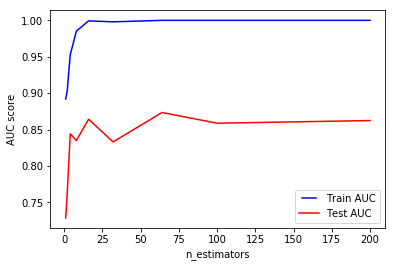

In [114]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train1, y_train1)
    train_pred = rf.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

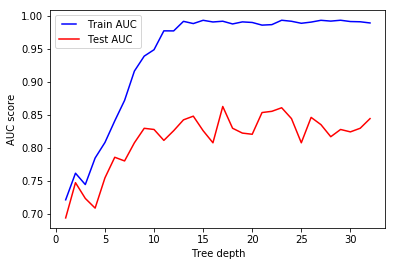

In [115]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train1, y_train1)
    train_pred = rf.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

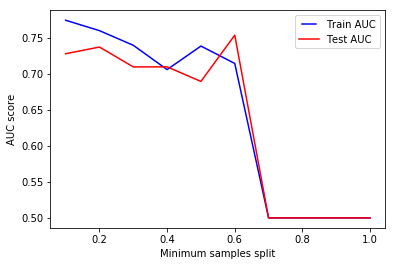

In [116]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=min_samples_split)
    rf.fit(X_train1, y_train1)
    train_pred = rf.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Minimum samples split')
plt.show()

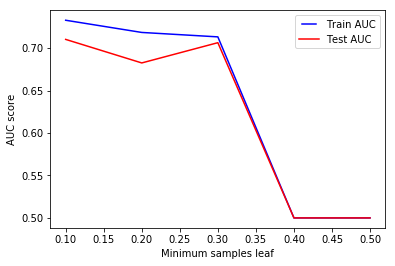

In [117]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rf.fit(X_train1, y_train1)
    train_pred = rf.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Minimum samples leaf')
plt.show()

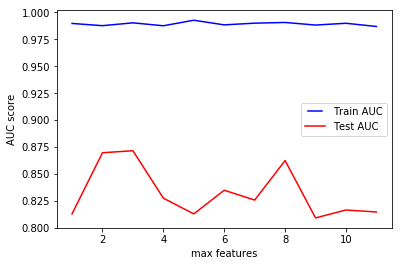

In [118]:
max_features = list(range(1,red.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature)
    rf.fit(X_train1, y_train1)
    train_pred = rf.predict(X_train1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train1, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test1)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test1, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

Implementing random search for parameter tuning

In [123]:
n_estimators = [21,22,23,25,27,28,29,30,32,34]
max_depth = [15,16,17,18,19,20,21,22,23,24,25,26]
min_samples_split = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
min_samples_leaf = [0.05,0.1,0.2,0.3,0.4,0.5]
max_features = [1,2,3,4,5,6,7,8]

In [124]:
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf,
             max_features=max_features)

In [125]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = hyperF, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

In [126]:
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 285 out of 300 | elapsed:    5.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.0s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=11,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
      

In [127]:
rf_random.best_params_

{'n_estimators': 34,
 'min_samples_split': 0.1,
 'min_samples_leaf': 0.05,
 'max_features': 8,
 'max_depth': 22}

In [128]:
y_preds = rf_random.predict(X)
print(accuracy_score(y, y_preds))

0.7622641509433963


Implementing grid search

In [129]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = hyperF,
                       cv = 3, 
                       verbose= 2, 
                       n_jobs = -1)

In [130]:
start = time()
rf_grid.fit(X, y)

Fitting 3 folds for each of 57600 candidates, totalling 172800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 7864 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 11424 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 15640 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 20496 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 26008 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 32160 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 38968 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 46416 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 54520 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 57864 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 60214 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=11,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              rand...
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 

In [131]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


In [132]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid.cv_results_['params'])))
report(rf_grid.cv_results_)

GridSearchCV took 1136.57 seconds for 57600 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.747 (std: 0.008)
Parameters: {'max_depth': 22, 'max_features': 2, 'min_samples_leaf': 0.1, 'min_samples_split': 0.05, 'n_estimators': 30}

Model with rank: 2
Mean validation score: 0.747 (std: 0.008)
Parameters: {'max_depth': 16, 'max_features': 2, 'min_samples_leaf': 0.05, 'min_samples_split': 0.1, 'n_estimators': 21}

Model with rank: 3
Mean validation score: 0.744 (std: 0.018)
Parameters: {'max_depth': 26, 'max_features': 4, 'min_samples_leaf': 0.05, 'min_samples_split': 0.1, 'n_estimators': 34}



In [133]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = hyperF,
                       cv = 3, 
                       verbose= 2, 
                       n_jobs = -1)

In [134]:
start = time()
rf_grid.fit(X, y)

Fitting 3 folds for each of 57600 candidates, totalling 172800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 4944 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 7864 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 11424 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 15640 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 20496 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 26008 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 32160 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 38968 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 46416 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 54520 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 63264 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 72664 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=11,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              rand...
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [15, 16, 17, 18, 19, 20, 21, 22, 23, 

In [135]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid.cv_results_['params'])))
report(rf_grid.cv_results_)

GridSearchCV took 1037.26 seconds for 57600 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.745 (std: 0.022)
Parameters: {'max_depth': 20, 'max_features': 5, 'min_samples_leaf': 0.05, 'min_samples_split': 0.1, 'n_estimators': 22}

Model with rank: 2
Mean validation score: 0.744 (std: 0.021)
Parameters: {'max_depth': 17, 'max_features': 4, 'min_samples_leaf': 0.05, 'min_samples_split': 0.1, 'n_estimators': 27}

Model with rank: 2
Mean validation score: 0.744 (std: 0.013)
Parameters: {'max_depth': 21, 'max_features': 2, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 30}



In [136]:
n_estimators = [23,25,27,28,29,30,32,33,34,35]
max_depth = [14,15,16,17,18,19,20,21,22,23]
min_samples_split = [0.05,0.1,0.2,0.3,0.4,0.5,0.6]
min_samples_leaf = [0.05,0.1,0.2,0.3]
max_features2=[2,3,4,5,6,7,8]

In [137]:
hyperF2 = dict(n_estimators = n_estimators, max_depth = max_depth,  
               min_samples_split = min_samples_split, 
               min_samples_leaf = min_samples_leaf,
               max_features = max_features2
             )

In [138]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = hyperF2,
                       cv = 3, 
                       verbose= 2, 
                       n_jobs = -1)

In [139]:
start = time()
rf_grid.fit(X, y)

Fitting 3 folds for each of 19600 candidates, totalling 58800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 3712 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 5902 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 8572 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 11734 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 15376 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 19510 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 24124 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 29230 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 34816 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 40894 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 47452 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 54502 ta

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=11,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              rand...e=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1,
      

In [140]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid.cv_results_['params'])))
report(rf_grid.cv_results_)

GridSearchCV took 431.17 seconds for 19600 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.745 (std: 0.020)
Parameters: {'max_depth': 19, 'max_features': 5, 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 27}

Model with rank: 2
Mean validation score: 0.745 (std: 0.011)
Parameters: {'max_depth': 16, 'max_features': 3, 'min_samples_leaf': 0.05, 'min_samples_split': 0.1, 'n_estimators': 34}

Model with rank: 3
Mean validation score: 0.744 (std: 0.007)
Parameters: {'max_depth': 22, 'max_features': 2, 'min_samples_leaf': 0.05, 'min_samples_split': 0.1, 'n_estimators': 30}



In [141]:
n_estimators = [23,25,27,28,29,30,32,33,34,35]
max_depth = [11,12,13,14,15,16,22]
min_samples_split = [0.025,0.05,0.1,0.2,0.3,0.4]
min_samples_leaf = [0.025, 0.05,0.1,0.2,0.3]
max_features2=[3,4,5,6,7,8]

In [142]:
hyperF3 = dict(n_estimators = n_estimators, max_depth = max_depth,  
               min_samples_split = min_samples_split, 
               min_samples_leaf = min_samples_leaf,
               max_features = max_features2
             )

In [143]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = hyperF3,
                       cv = 3, 
                       verbose= 2, 
                       n_jobs = -1)

In [144]:
start = time()
rf_grid.fit(X, y)

Fitting 3 folds for each of 12600 candidates, totalling 37800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 2480 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 3940 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 5720 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 7828 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 10256 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 13012 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 16088 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 19492 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 23216 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 27268 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 31640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 36340 tas

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=11,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              rand..., verbose=0,
                                              warm_start=False),
             iid='warn', n_jobs=-1

In [145]:
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(rf_grid.cv_results_['params'])))
report(rf_grid.cv_results_)

GridSearchCV took 301.33 seconds for 12600 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.748 (std: 0.018)
Parameters: {'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 0.025, 'min_samples_split': 0.025, 'n_estimators': 35}

Model with rank: 2
Mean validation score: 0.747 (std: 0.006)
Parameters: {'max_depth': 11, 'max_features': 3, 'min_samples_leaf': 0.025, 'min_samples_split': 0.1, 'n_estimators': 35}

Model with rank: 3
Mean validation score: 0.746 (std: 0.011)
Parameters: {'max_depth': 11, 'max_features': 3, 'min_samples_leaf': 0.025, 'min_samples_split': 0.05, 'n_estimators': 29}



As is shown above Random Forest Classifier was choosen for further tuning according to the best accuracy score and good precentage of recall score. But with using Random Search or Grid Search, which uses cross validation technique for splitting dataframe for trainingg and testing data sets, lowwers forementioned ratings. This mean that this data sets includes not enough data for better fitting especialy for wines qualified as 3,4,8 and each wine quality is very simllar to each other, which is shown by pair plots.
It could be shown also in the part of searching for best classication algorithm when the same algorithm was performing worse with all qulities splited into 2 groups than with 2 major groups. 